<img src="upGrad.png" alt="upGrad" align="Right" style="width: 200px;"/>
<img src="IIITB.jpeg" alt="IITB" align="Left" style="width: 200px;"/>

# Clustering and PCA assignment
<i> Author: Anish Mahapatra </i>

<i>Machine Learning I > Module 6</i>

### Problem Statement:
    
The CEO of the HELP, the NGO needs to decide how to use $10 million effectively. We have to choose the countries that are in the direst need of aid.  Categorise the countries using some socio-economic and health factors that determine the overall development of the country. 

Suggest the countries which the CEO needs to focus on the most.

### Suggested Approach:

- Perform PCA, choose the appropriate number of components 'k'

- Clustering is to be done on the k chosen components

- Outlier Analysis

- K-means to be done

- Single Linkage Hierchial Clustering

- Complete Linkage Hierarchial Clustering (May not produce identical results)

For cluster analysis, use the columns: gdpp, child_mort and income to recognize and differentiate the clusters of developed countries from the cluster of under-developed countries.

- Perform visualisations on the clusters that have been formed.  Choose first two Principal Components (on the X-Y axes) and plot a scatter plot of all the countries and differentiating the clusters

- You should also do the same visualisation using any two of the original variables (like gdpp, child_mort, etc.) on the X-Y axes as well. You can also choose other types of plots like boxplots, etc. 

- Reportat least 5 countries which are in direst need of aid


In [1]:
# Importing required packages

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

%matplotlib inline


In [2]:
# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ignoring warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing the dataset as a pandas dataframe
countryData = pd.read_csv('Country-data.csv')

#### Sense Check of the Country Data

In [4]:
# Viewing the data
countryData.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# Viewing the shape of the data
countryData.shape

(167, 10)

There are 167 rows and 10 columns

In [6]:
# Viewing the data types of the columns
countryData.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

So, here we notice that that there is one column that is of a type 'string'

In [7]:
# Information regarding the dataset
countryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


The dataset looks good so far. Let's go ahead, make a copy of the data set and perform missing value analysis and outlier analysis on the dataset.

In [8]:
df = countryData.copy(deep = False)

### Missing Value Analysis

In [9]:
# Calculating the percent of missing values in the dataframe
percentMissing = (df.isnull().sum() / len(df)) * 100

# Making a dataframe with the missing values % and columns into a dataframe (on account of large number of rows) 
missingValuesDf = pd.DataFrame({'Column Name': df.columns,
                                 'Percent of data missing': percentMissing})

In [10]:
missingValuesDf

,Column Name,Percent of data missing
country,country,0.0
child_mort,child_mort,0.0
exports,exports,0.0
health,health,0.0
imports,imports,0.0
income,income,0.0
inflation,inflation,0.0
life_expec,life_expec,0.0
total_fer,total_fer,0.0
gdpp,gdpp,0.0


Hence, there are **no missing values** in the data in any of the columns.

### Outlier Analysis

Let us now analyze all the numerical columns of the dataset for outliers.

<b>Note:</b> The Boxplots below have been plotted with the standard whiskers of 1.5 x (IQR)

In [11]:
# Selecting only the numeric columns to perform correlation analysis
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)

In [12]:
# Displaying the top 5 rows of only the numerical values
df_num.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
# Viewing the columns of the data set
df_num.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

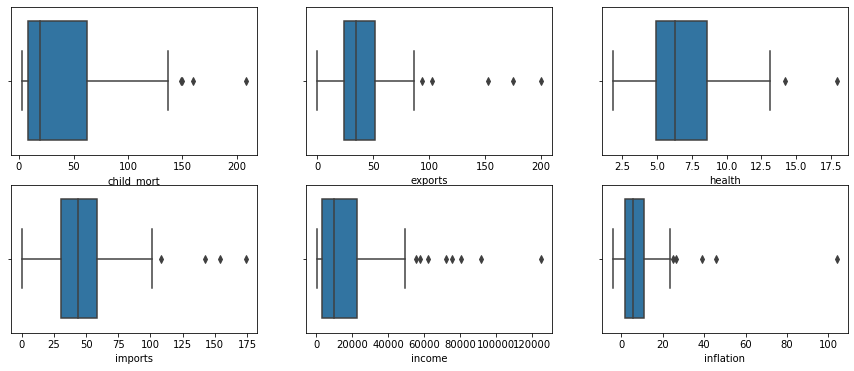

In [14]:
# Making boxplots as sub-plots to understand the trend of the data 
plt.figure(figsize=(15, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'child_mort', data = df_num)
plt.subplot(2,3,2)
sns.boxplot(x = 'exports', data = df_num)
plt.subplot(2,3,3)
sns.boxplot(x = 'health', data = df_num)
plt.subplot(2,3,4)
sns.boxplot(x = 'imports', data = df_num)
plt.subplot(2,3,5)
sns.boxplot(x = 'income', data = df_num)
plt.subplot(2,3,6)
sns.boxplot(x = 'inflation', data = df_num)
plt.show()

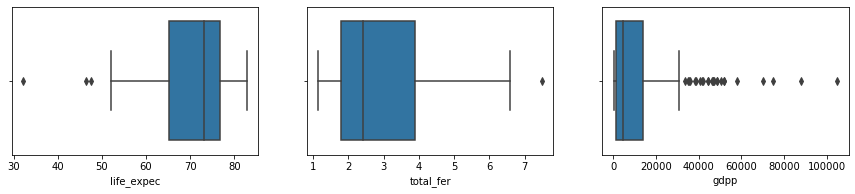

In [15]:
# Making boxplots as sub-plots to understand the trend of the data 
plt.figure(figsize=(15, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'life_expec', data = df_num)
plt.subplot(2,3,2)
sns.boxplot(x = 'total_fer', data = df_num)
plt.subplot(2,3,3)
sns.boxplot(x = 'gdpp', data = df_num)

Here, we recollect that PCA is sensitive to outliers and we have to act accordingly

In [16]:
# Remove the outliers

def removeOutliers (dat, columnName):
    q1 = dat[columnName].quantile(0.01)
    q4 = dat[columnName].quantile(0.99)
    dat = dat[(dat[columnName]>=q1) & (dat[columnName]<=q4)]
    return dat

In [17]:
# # viewing the columns of the data
# df_num.columns

In [18]:
# # Removing the 99 percentile and and 1 percentile
# columnNames = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# for stringName in columnNames:
#     df_num = removeOutliers(df_num, stringName)


In [19]:
# # Making boxplots as sub-plots to understand the trend of the data 
# plt.figure(figsize=(15, 6))
# plt.subplot(2,3,1)
# sns.boxplot(x = 'child_mort', data = df_num)
# plt.subplot(2,3,2)
# sns.boxplot(x = 'exports', data = df_num)
# plt.subplot(2,3,3)
# sns.boxplot(x = 'health', data = df_num)
# plt.subplot(2,3,4)
# sns.boxplot(x = 'imports', data = df_num)
# plt.subplot(2,3,5)
# sns.boxplot(x = 'income', data = df_num)
# plt.subplot(2,3,6)
# sns.boxplot(x = 'inflation', data = df_num)
# plt.show()

In [20]:
# # Making boxplots as sub-plots to understand the trend of the data 
# plt.figure(figsize=(15, 6))
# plt.subplot(2,3,1)
# sns.boxplot(x = 'life_expec', data = df_num)
# plt.subplot(2,3,2)
# sns.boxplot(x = 'total_fer', data = df_num)
# plt.subplot(2,3,3)
# sns.boxplot(x = 'gdpp', data = df_num)

In [21]:
# df_num.shape

### Standardizing the Data

We do not have categorical or binary values to consider here, so we can standardize all of the values in df_num

In [22]:
# Normalizing the data
normalized_df=(df_num-df_num.mean())/df_num.std()
normalized_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [23]:
normalized_df=(df_num-df_num.mean())/df_num.std()
df_country = df['country']
df = pd.concat([df_country,normalized_df],axis=1)
normalized_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


### PCA

In [24]:
from sklearn.decomposition import PCA

In [25]:
# Instantiating an instance of PCA
pca = PCA(random_state=100)

In [26]:
pca.fit(normalized_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
# Viewing the PCA components (There will be 9 components as there are 9 numerical columns)
pca.components_.round(2)

array([[-0.42,  0.28,  0.15,  0.16,  0.4 , -0.19,  0.43, -0.4 ,  0.39],
       [ 0.19,  0.61, -0.24,  0.67,  0.02, -0.01, -0.22,  0.16, -0.05],
       [-0.03,  0.14, -0.6 , -0.3 ,  0.3 ,  0.64,  0.11,  0.02,  0.12],
       [ 0.37,  0.  ,  0.46, -0.07,  0.39,  0.15, -0.2 ,  0.38,  0.53],
       [-0.17,  0.06,  0.52,  0.26, -0.25,  0.71,  0.11, -0.14, -0.18],
       [ 0.2 , -0.06,  0.01, -0.03,  0.16,  0.07, -0.6 , -0.75,  0.02],
       [-0.08, -0.71, -0.25,  0.59,  0.1 ,  0.1 ,  0.02,  0.03,  0.24],
       [-0.68, -0.01,  0.07, -0.03,  0.35, -0.01, -0.5 ,  0.29, -0.25],
       [ 0.33, -0.12,  0.11,  0.1 ,  0.61, -0.03,  0.29, -0.03, -0.63]])

Let us now look at the explained variance ratio for the components

In [28]:
# Plotting explained variance ratio
pca.explained_variance_ratio_.round(2)

array([0.46, 0.17, 0.13, 0.11, 0.07, 0.02, 0.01, 0.01, 0.01])

Great, we notice that about 80% of the variance is explained with the first 5 variables. 

We would like to explain about 80-90% of the variance.

#### Scree Plot

In [29]:
# Let us take the cumulative variance of the explained variance ratios
var_cumu = np.cumsum(pca.explained_variance_ratio_)

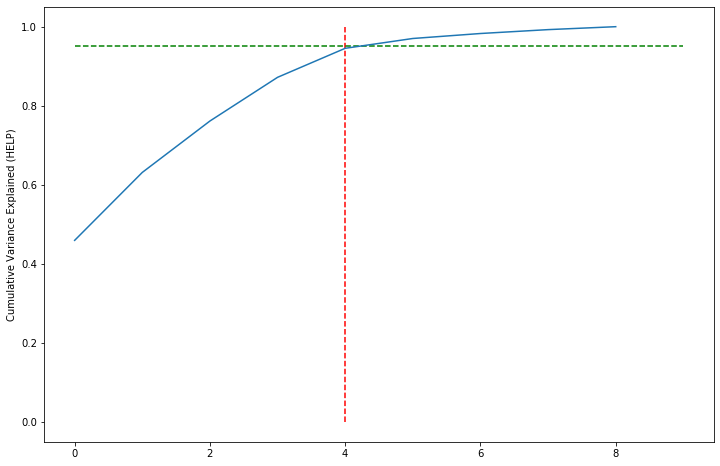

In [30]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=9, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative Variance Explained (HELP)")
plt.show()

We now decide to do PCA with 5 (0 to 4) components as it explains a majority of the variance

To make the process more efficient, we shall not perform Incremental PCA using n_components = 5

#### Incremental PCA with 5 components

In [31]:
# importing Incremental PCA
from sklearn.decomposition import IncrementalPCA

In [32]:
# Using 4 components to perform incremental PCA
pca_final = IncrementalPCA(n_components = 5)

In [33]:
# Fitting and transforming the components on the normalized dataset  
df_pca = pca_final.fit_transform(normalized_df)

In [34]:
# Verifying that we have n_components = 4 (columns)
df_pca.shape

(167, 5)

The above functions should have essentially created 5 uncorrelated features that mostly explains the variance of the data.

We can verify that the chosen features are uncorrelated with the help of a heatmap

In [35]:
# Plotting the correlation matrix
corrmat = np.corrcoef(df_pca.transpose())
corrmat.shape

(5, 5)

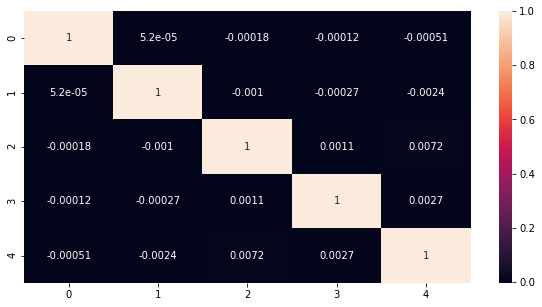

In [36]:
# Plotting the heatmap
plt.figure(figsize=[10,5])
sns.heatmap(corrmat, annot=True)

Great, the chose PCA components are not correlated.

Now, let us make a dataframe from the 5 chosen components.

In [37]:
df = pd.DataFrame(df_pca, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"])
df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5
0,-2.904265,0.091694,-0.719080,0.998834,-0.146325
1,0.428581,-0.587606,-0.327626,-1.161521,0.152746
2,-0.284433,-0.450783,1.228356,-0.855195,0.190654
3,-2.923920,1.693677,1.520503,0.853030,-0.214134
4,1.030273,0.133451,-0.216049,-0.844099,-0.192607


In [38]:
# Concatenating the country to the 5 chosen PCA components
df_final = pd.concat([df, df_country], axis=1)

In [39]:
# Viewing the dataset
df_final.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,country
0,-2.904265,0.091694,-0.719080,0.998834,-0.146325,Afghanistan
1,0.428581,-0.587606,-0.327626,-1.161521,0.152746,Albania
2,-0.284433,-0.450783,1.228356,-0.855195,0.190654,Algeria
3,-2.923920,1.693677,1.520503,0.853030,-0.214134,Angola
4,1.030273,0.133451,-0.216049,-0.844099,-0.192607,Antigua and Barbuda


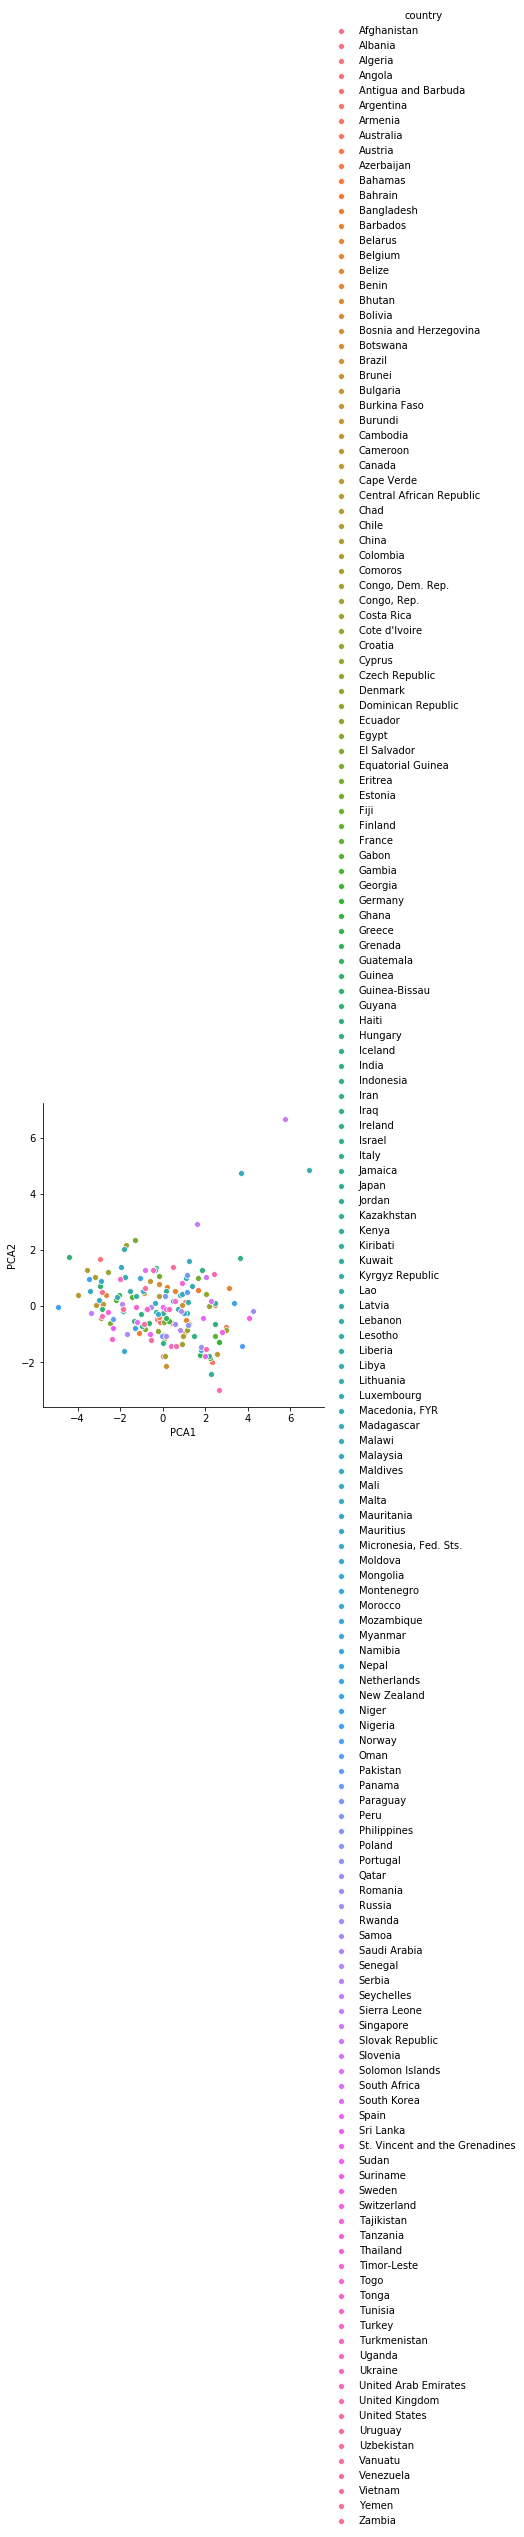

In [40]:
# Plotting the data
sns.pairplot(data=df_final, x_vars=["PCA1"], y_vars=["PCA2"], hue = "country", size=5)

Glad to know that it makes no sense right now. We shall now proceed to use clusteing to try and cluster the data.

In [45]:
removeCountry = df_final.pop('country')

In [46]:
from sklearn.cluster import KMeans

In [47]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=5, max_iter=50, random_state=100)
kmeans.fit(df_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

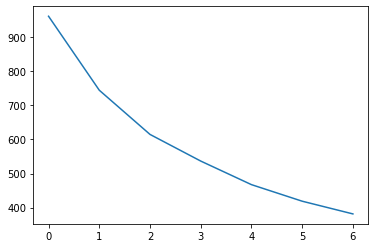

In [48]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_final)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

#### Hierarchial Clustering

In [49]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

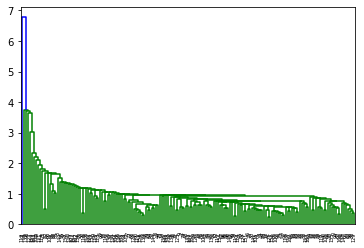

In [50]:
# single linkage
mergings = linkage(df_final, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

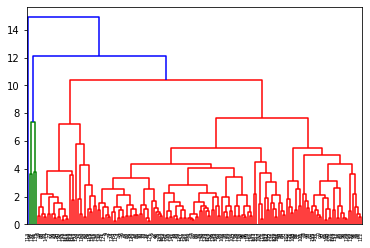

In [51]:
# complete linkage
mergings = linkage(df_final, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()